# Analysing Fuel Economy

Here is the summarised information of the dataset:  

Model – Vehicle make and model  
Displ – Engine displacement - the size of an engine in liters  
Cyl – The number of cylinders in a particular engine  
Trans – Transmission type and number of gears  
Drive – Drive axle type (2WD = 2-wheel drive, 4WD = 4-wheel/all-wheel drive)  
Fuel – Fuel type i.e. gasoline, diesel, ethanol, etc  
Cert Region - Certification Region Code i.e. CA - California  
Veh Class – EPA vehicle class. See here  
Air Pollution Score - Also known as Smog Rating) – see here and here  
City MPG – Estimated city mpg (miles/gallon)  
Hwy MPG – Estimated highway mpg (miles/gallon)  
Cmb MPG – Estimated combined mpg (miles/gallon)  
Greenhouse Gas Score (Greenhouse Gas Rating) – see here  
SmartWay – Yes, No, or Elite. See here  

### Asking Questions

Based on an initial study of the dataset, we have come up with several questions that we would like the answer to and, which our analysis would be based on.

The questions are
- Are **more models using alternative sources** of fuel? By how much?
- How much have **vehicle classes improved in fuel economy**?
- What are the **characteristics of SmartWay** vehicles?
- What features are associated with **better fuel economy**?
- For all the models that were produced in 2008 that are still produced in 2018, how much has the **mpg (miles/gallon) improved** and which vehicle improved the most?

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('all_alpha_08.csv')
df2 = pd.read_csv('all_alpha_18.csv')

In [3]:
df1.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [4]:
df2.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


#### The files all_alpha_08.csv and all_alpha_18.csv discussed in the previous pages have been provided in the workspace for you here to access.  
Use pandas to explore these datasets in the Jupyter Notebook below to answer the quiz questions   below the notebook about these characteristics of the data:  
  
*number of samples in each dataset  
*number of columns in each dataset  
*duplicate rows in each dataset  
*datatypes of columns  
*features with missing values  
*number of non-null unique values for features in each dataset  
*what those unique values are and counts for each  

We will run a few queries to get these information from our data set.
- How many **samples (rows/observations) and columns** does our data sets have?
- Are there any **duplicated rows** and if yes, how many?
- What are the **data types**?
- Is there any **missing values** and if yes, how many?
- What are the **unique values** and what is the count?

In [5]:
# number of samples and columns in each dataset
df1.shape, df2.shape

((2404, 18), (1611, 18))

In [6]:
df1.info(), df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

(None, None)

In [7]:
# duplicate rows in each dataset
df1.duplicated().sum(), df2.duplicated().sum()

(25, 0)

In [8]:
# datatypes of columns
df1.info(), df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

(None, None)

In [9]:
df1.isnull().sum(), df2.isnull().sum()

(Model                     0
 Displ                     0
 Cyl                     199
 Trans                   199
 Drive                    93
 Fuel                      0
 Sales Area                0
 Stnd                      0
 Underhood ID              0
 Veh Class                 0
 Air Pollution Score       0
 FE Calc Appr            199
 City MPG                199
 Hwy MPG                 199
 Cmb MPG                 199
 Unadj Cmb MPG           199
 Greenhouse Gas Score    199
 SmartWay                  0
 dtype: int64,
 Model                   0
 Displ                   2
 Cyl                     2
 Trans                   0
 Drive                   0
 Fuel                    0
 Cert Region             0
 Stnd                    0
 Stnd Description        0
 Underhood ID            0
 Veh Class               0
 Air Pollution Score     0
 City MPG                0
 Hwy MPG                 0
 Cmb MPG                 0
 Greenhouse Gas Score    0
 SmartWay                0
 Com

In [10]:
# # fixing column names 
# df1.rename(columns= {'fixed acidity': 'fixed_acidity'}, inplace = True)
# df1.rename(columns= {'volatile acidity': 'volatile_acidity'}, inplace = True)
# df1.rename(columns= {'citric acid': 'citric_acid'}, inplace = True)
# df1.rename(columns= {'residual sugar': 'residual_sugar'}, inplace = True)
# df1.rename(columns= {'free sulfur dioxide': 'free_sulfur_dioxide'}, inplace = True)
# df1.rename(columns= {'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace = True)

In [11]:
# number of non-null unique values for features in each dataset
df1.nunique(), df2.nunique()

(Model                   436
 Displ                    47
 Cyl                       8
 Trans                    14
 Drive                     2
 Fuel                      5
 Sales Area                3
 Stnd                     12
 Underhood ID            343
 Veh Class                 9
 Air Pollution Score      13
 FE Calc Appr              2
 City MPG                 39
 Hwy MPG                  43
 Cmb MPG                  38
 Unadj Cmb MPG           721
 Greenhouse Gas Score     20
 SmartWay                  2
 dtype: int64,
 Model                   367
 Displ                    36
 Cyl                       7
 Trans                    26
 Drive                     2
 Fuel                      5
 Cert Region               2
 Stnd                     19
 Stnd Description         19
 Underhood ID            230
 Veh Class                 9
 Air Pollution Score       6
 City MPG                 58
 Hwy MPG                  62
 Cmb MPG                  57
 Greenhouse Gas Score     10

In [12]:
df1.Fuel.unique(), df2.Fuel.unique()

(array(['Gasoline', 'ethanol/gas', 'ethanol', 'diesel', 'CNG'],
       dtype=object),
 array(['Gasoline', 'Gasoline/Electricity', 'Diesel', 'Ethanol/Gas',
        'Electricity'], dtype=object))

### Drop Extraneous Columns

In [13]:
# drop columns from 2008 dataset
df1.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

# confirm changes
df1.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [14]:
df2.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace = True)

### Rename Columns

In [15]:
# rename Sales Area to Cert Region
# help(df1.rename)
df1.rename(columns={'Sales Area': 'Cert Region'}, inplace= True)
# confirm changes
df1.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [16]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df1.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# confirm changes
df1.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [17]:
df2.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
df2.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [18]:
# all columns are identical
# (df1.columns == df2.columns).all()
df1.columns == df2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [19]:
(df1.columns == df2.columns).all()

True

In [20]:
# save new datasets 
df1.to_csv('df08.csv', index = False)
df2.to_csv('df18.csv', index = False)

# Filter, Drop Nulls, Dedupe
using new csv's

In [21]:
df1 = pd.read_csv('df08.csv')
df2 = pd.read_csv('df18.csv')

In [22]:
df1.shape, df2.shape

((2404, 14), (1611, 14))

## Filter by Certification Region 'CA'

In [23]:
df1.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [24]:
df1.query('cert_region == "CA"', inplace=True)
df2.query('cert_region == "CA"', inplace=True)

In [25]:
# confirm only certification region is California
df1.cert_region.unique(), df2.cert_region.unique()

(array(['CA'], dtype=object), array(['CA'], dtype=object))

In [26]:
df1.shape, df2.shape

((1084, 14), (798, 14))

In [27]:
# drop certification region columns form both datasets
df1.drop('cert_region', axis=1, inplace=True)
df2.drop('cert_region', axis=1, inplace=True)

In [28]:
df1.shape, df2.shape

((1084, 13), (798, 13))

## Drop Rows with Missing Values

In [29]:
# view missing value count for each feature in 2008
df1.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [30]:
# view missing value count for each feature in 2018
df2.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [31]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)

In [32]:
df1.isnull().sum().any(), df2.isnull().sum().any()

(False, False)

## Dedupe Data

In [33]:
# print number of duplicates in 2008 and 2018 datasets
df1.duplicated().sum(), df2.duplicated().sum()

(23, 3)

In [34]:
# drop duplicates in both datasets
df1.drop_duplicates(inplace=True), df2.drop_duplicates(inplace=True)

(None, None)

In [35]:
df1.shape, df2.shape

((986, 13), (794, 13))

In [36]:
df1.duplicated().sum(), df2.duplicated().sum()

(0, 0)

In [37]:
df1.to_csv('df08_01.csv')
df2.to_csv('df18_01.csv')

# Inspecting Data Types


In [38]:
df1.dtypes, df2.dtypes

(model                    object
 displ                   float64
 cyl                      object
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score      object
 city_mpg                 object
 hwy_mpg                  object
 cmb_mpg                  object
 greenhouse_gas_score     object
 smartway                 object
 dtype: object,
 model                    object
 displ                   float64
 cyl                     float64
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score       int64
 city_mpg                 object
 hwy_mpg                  object
 cmb_mpg                  object
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object)

In [39]:
df1.air_pollution_score.info(), df2.air_pollution_score.info()

<class 'pandas.core.series.Series'>
Int64Index: 986 entries, 0 to 2400
Series name: air_pollution_score
Non-Null Count  Dtype 
--------------  ----- 
986 non-null    object
dtypes: object(1)
memory usage: 15.4+ KB
<class 'pandas.core.series.Series'>
Int64Index: 794 entries, 1 to 1609
Series name: air_pollution_score
Non-Null Count  Dtype
--------------  -----
794 non-null    int64
dtypes: int64(1)
memory usage: 12.4 KB


(None, None)

Noticed that there were some inconsistencies in the data types, hence we will performing the following fixes:

**1. Fix `cyl` datatype**
- 2008: extract int from string.
- 2018: convert float to int.

**2. Fix `air_pollution_score` datatype**
- 2008: convert string to float.
- 2018: convert int to float.

**3. Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes**
- 2008 and 2018: convert string to float.

**4. Fix `greenhouse_gas_score` datatype**
- 2008: convert from float to int.

We will start with the first conversion.

### 1. Fix `cyl` Datatype

- 2008: extract int from string.
- 2018: convert float to int.

By using `df['col_name'].value_counts()`, we can find the number of values of each unique values in the selected column. 

In this case, we are finding for the unique values in `cyl` column and its count.

In [40]:
# check value counts for the 2008 cyl column
df1['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [41]:
# Extract int from strings in the 2008 cyl column

# Set "'(\d+)'" to extract numerical digits
# "\d" represents the numbers 0-9; "+" to indicate there's more than 1 number
df1['cyl'] = df1['cyl'].str.extract('(\d+)').astype(int)

In [42]:
# Check value counts for 2008 cyl column again to confirm the change

df1.cyl.value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [43]:
# convert 2018 cyl column to int
df2['cyl'] = df2['cyl'].astype(int)

In [44]:
df1.to_csv('df08_02.csv', index=False)
df2.to_csv('df18_02.csv', index=False)

# Fixing `air_pollution_score` Data Type
- 2008: convert string to float
- 2018: convert int to float

In [45]:
df1 = pd.read_csv('df08_02.csv')
df2 = pd.read_csv('df18_02.csv')

In [46]:
# check value counts for the 2008 air_pollution_score column
df1['air_pollution_score'].value_counts()

6      500
7      398
9.5     80
9        7
6/4      1
Name: air_pollution_score, dtype: int64

In [47]:
# try using pandas' to_numeric or astype function to convert the
# 2008 air_pollution_score column to float -- this won't work
# df1.air_pollution_score = df1.air_pollution_score.astype(float)

# Figuring out the issue
Looks like this isn't going to be as simple as converting the datatype. According to the error above, the air pollution score value in one of the rows is "6/4" - let's check it out.

In [48]:
df1[df1.air_pollution_score == '6/4']

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


# It's not just the air pollution score!
The mpg columns and greenhouse gas scores also seem to have the same problem - maybe that's why these were all saved as strings! According to [this link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), which I found from the PDF documentation:

    "If a vehicle can operate on more than one type of fuel, an estimate is provided for each fuel type."
    
Ohh... so all vehicles with more than one fuel type, or hybrids, like the one above (it uses ethanol AND gas) will have a string that holds two values - one for each.

In [49]:
# First, let's get all the hybrids in 2008, hb stands for hyper
hb1 = df1[df1['fuel'].str.contains('/')]
hb1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [50]:
hb2 = df2[df2['fuel'].str.contains('/')]
hb2.head(5)

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No


In [51]:
hb1.fuel.value_counts()

ethanol/gas    1
Name: fuel, dtype: int64

In [52]:
hb2.fuel.value_counts()

Ethanol/Gas             26
Gasoline/Electricity    12
Name: fuel, dtype: int64

We're going to take each hybrid row and split them into two new rows - one with values for the first fuel type (values before the "/"), and the other with values for the second fuel type (values after the "/"). Let's separate them with two dataframes!

In [53]:
# create two copies of the 2008 hybrids dataframe
df081 = hb1.copy()  # data on first fuel type of each hybrid vehicle
df082 = hb1.copy()  # data on second fuel type of each hybrid vehicle

# Each one should look like this
df081

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


For this next part, we're going use pandas' apply function. See the docs [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html).

In [54]:
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df081[c] = df081[c].apply(lambda x: x.split("/")[0])
    df082[c] = df082[c].apply(lambda x: x.split("/")[1])

In [55]:
# this dataframe holds info for the FIRST fuel type of the hybrid for df_08
# aka the values before the "/"s
df081

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [56]:
# this dataframe holds info for the SECOND fuel type of the hybrid for df_08
# aka the values after the "/"s
df082

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [57]:
# combine dataframes to add to the original dataframe
new_rows = df081.append(df082)

# now we have separate rows for each fuel type of each vehicle!
new_rows

C:\Users\Youssef\AppData\Local\Temp\ipykernel_12248\1774754586.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = df081.append(df082)


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [58]:
# drop the original hybrid rows
df1.drop(hb1.index, inplace=True)

# add in our newly separated rows
df1 = df1.append(new_rows, ignore_index=True)

C:\Users\Youssef\AppData\Local\Temp\ipykernel_12248\928059843.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_rows, ignore_index=True)


In [59]:
# check that all the original hybrid rows with "/"s are gone
df1[df1['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [60]:
df1.shape

(987, 13)

# Repeat this process for the 2018 dataset

### Split values for `fuel`, `city_mpg`, `hwy_mpg`, `cmb_mpg`
You don't need to split for `air_pollution_score` or `greenhouse_gas_score` here because these columns are already ints in the 2018 dataset.

In [61]:
# create two copies of the 2018 hybrids dataframe, hb_18
df181 = hb2.copy()
df182 = hb2.copy()

In [62]:
# list of columns to split
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split fn to each column of each dataframe copy
for c in split_columns:
    df181[c] = df181[c].apply(lambda x: x.split("/")[0]) 
    df182[c] = df182[c].apply(lambda x: x.split("/")[1])  

In [63]:
# append the two dataframes
new_rows = df181.append(df182)

# drop each hybrid row from the original 2018 dataframe
# do this by using pandas' drop function with hb_18's index
df2.drop(hb2.index, inplace=True)

# append new_rows to df_18
df2 = df2.append(new_rows, ignore_index=True)

C:\Users\Youssef\AppData\Local\Temp\ipykernel_12248\1809997243.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_rows = df181.append(df182)
C:\Users\Youssef\AppData\Local\Temp\ipykernel_12248\1809997243.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(new_rows, ignore_index=True)


In [64]:
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3,20,32,24,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3,21,30,24,5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,TOYOTA Sequoia FFV,5.7,8,SemiAuto-6,4WD,Gas,standard SUV,5,13,17,14,1,No
828,TOYOTA Tundra FFV,5.7,8,SemiAuto-6,4WD,Gas,pickup,5,13,17,15,2,No
829,VOLVO S90,2.0,4,SemiAuto-8,4WD,Electricity,midsize car,7,70,72,71,10,Elite
830,VOLVO XC 60,2.0,4,SemiAuto-8,4WD,Electricity,small SUV,7,60,58,59,10,Elite


In [65]:
df2.shape

(832, 13)

### Now we can comfortably continue the changes needed for `air_pollution_score`! Here they are again:
- 2008: convert string to float
- 2018: convert int to float

In [66]:
# convert string to float for 2008 air pollution column
df1.air_pollution_score = df1['air_pollution_score'].astype(float)

In [67]:
# convert int to float for 2018 air pollution column
df2.air_pollution_score = df2['air_pollution_score'].astype(float)

In [68]:
df1.to_csv('df08_03.csv.csv', index=False)
df2.to_csv('df18_03.csv.csv', index=False)

In [69]:
df1.shape, df2.shape

((987, 13), (832, 13))

## Fix `city_mpg`, `hwy_mpg`, `cmb_mpg` datatypes
    2008 and 2018: convert string to float

In [70]:
df1.dtypes, df2.dtypes

(model                    object
 displ                   float64
 cyl                       int64
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                 object
 hwy_mpg                  object
 cmb_mpg                  object
 greenhouse_gas_score     object
 smartway                 object
 dtype: object,
 model                    object
 displ                   float64
 cyl                       int64
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                 object
 hwy_mpg                  object
 cmb_mpg                  object
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object)

In [71]:
# convert mpg columns to floats
mpg_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in mpg_columns:
    df1[c] = df1[c].astype('float')
    df2[c] = df2[c].apply(lambda x: float(x))

In [72]:
df1.dtypes, df2.dtypes

(model                    object
 displ                   float64
 cyl                       int64
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                float64
 hwy_mpg                 float64
 cmb_mpg                 float64
 greenhouse_gas_score     object
 smartway                 object
 dtype: object,
 model                    object
 displ                   float64
 cyl                       int64
 trans                    object
 drive                    object
 fuel                     object
 veh_class                object
 air_pollution_score     float64
 city_mpg                float64
 hwy_mpg                 float64
 cmb_mpg                 float64
 greenhouse_gas_score      int64
 smartway                 object
 dtype: object)

## Fix `greenhouse_gas_score` datatype
    2008: convert from float to int

In [73]:
# convert from float to int
df1['greenhouse_gas_score'] = df1['greenhouse_gas_score'].astype(np.int64)

### All the dataypes are now fixed! Take one last check to confirm all the changes.

In [74]:
df1.dtypes == df2.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

In [75]:
# Save your final CLEAN datasets as new files!
df1.to_csv('clean08.csv', index=False)
df2.to_csv('clean18.csv', index=False)

# Exploring with Visuals
Use `clean_08.csv` and `clean_18.csv`.

In [76]:
df1 = pd.read_csv('clean08.csv')
df2 = pd.read_csv('clean18.csv')

Compare the distributions of greenhouse gas score in 2008 and 2018.

<Axes: >

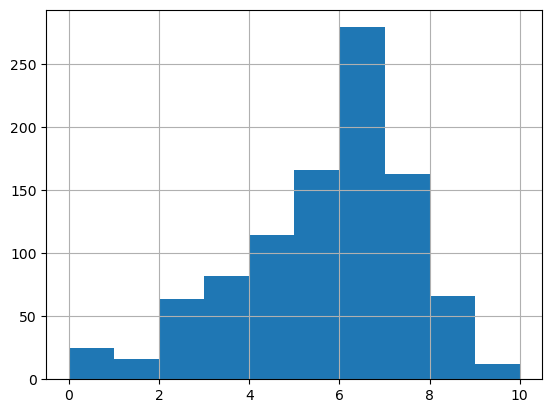

In [77]:
df1.greenhouse_gas_score.hist()

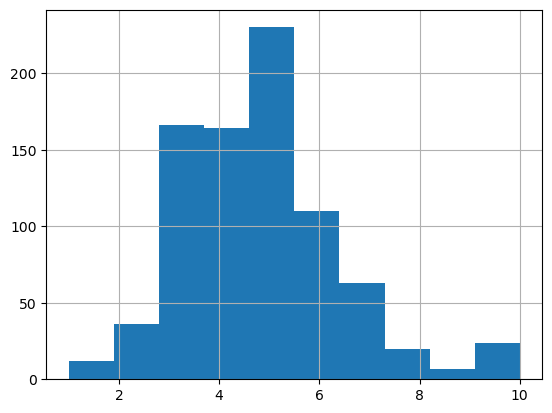

In [78]:
df2.greenhouse_gas_score.hist();

How has the distribution of combined mpg changed from 2008 to 2018?

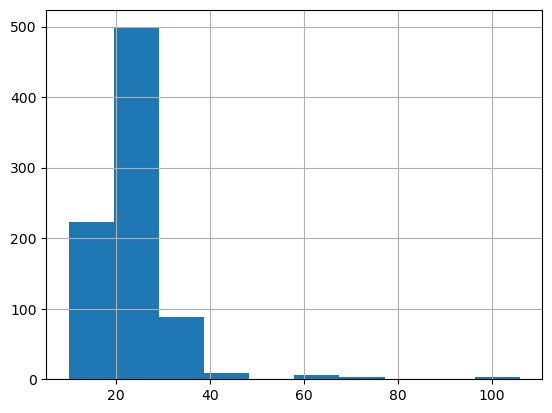

In [79]:
df2.cmb_mpg.hist();

In [80]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987 entries, 0 to 986
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 987 non-null    object 
 1   displ                 987 non-null    float64
 2   cyl                   987 non-null    int64  
 3   trans                 987 non-null    object 
 4   drive                 987 non-null    object 
 5   fuel                  987 non-null    object 
 6   veh_class             987 non-null    object 
 7   air_pollution_score   987 non-null    float64
 8   city_mpg              987 non-null    float64
 9   hwy_mpg               987 non-null    float64
 10  cmb_mpg               987 non-null    float64
 11  greenhouse_gas_score  987 non-null    int64  
 12  smartway              987 non-null    object 
dtypes: float64(5), int64(2), object(6)
memory usage: 100.4+ KB


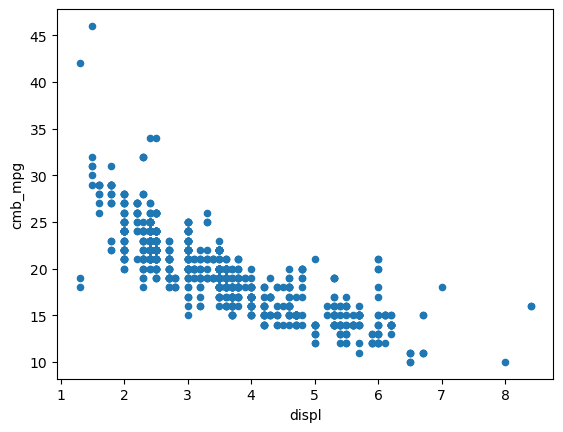

In [81]:
df1.plot(x='displ', y='cmb_mpg', kind='scatter');

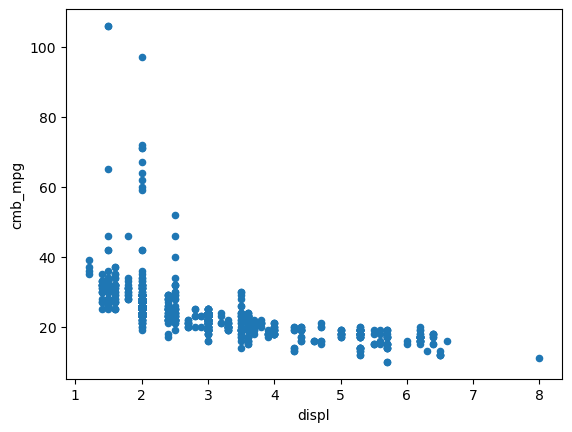

In [82]:
df2.plot(x='displ', y='cmb_mpg', kind='scatter');

### Describe the correlation between greenhouse gas score and combined mpg.

<Axes: xlabel='greenhouse_gas_score', ylabel='cmb_mpg'>

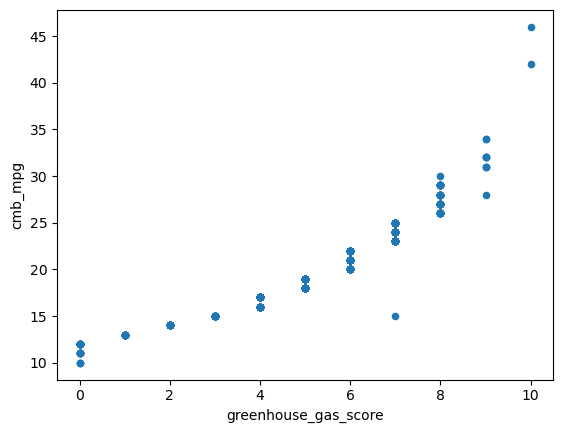

In [83]:
df1.plot(x='greenhouse_gas_score', y='cmb_mpg', kind='scatter')

<Axes: xlabel='greenhouse_gas_score', ylabel='cmb_mpg'>

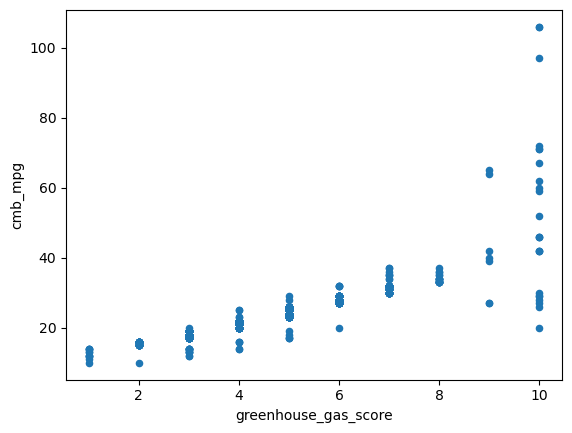

In [84]:
 df2.plot(x='greenhouse_gas_score', y='cmb_mpg', kind='scatter')

There is a positive correlation. The _**higher**_ the greenhouse gas score rating, the _**higher**_ the combined city/highway fuel economy in miles per gallon.

### Q1: Are more unique models using alternative sources of fuel? By how much?

In [85]:
df1.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

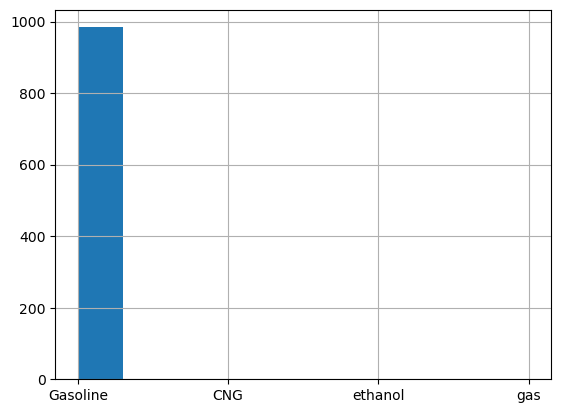

In [86]:
df1.fuel.hist();  df1.fuel.value_counts()

Gasoline       749
Ethanol         26
Gas             26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

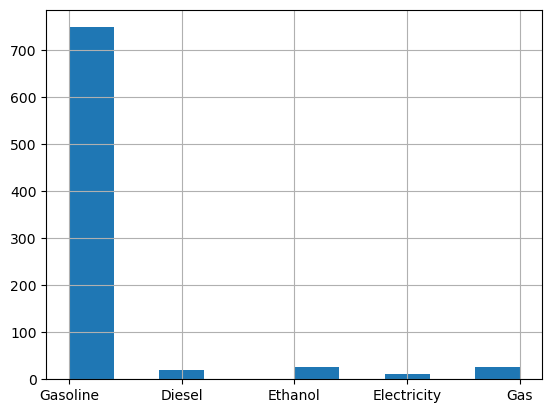

In [87]:
df2.fuel.hist();  df2.fuel.value_counts()

Looks like the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity. (You can use Google if you weren't sure which ones are alternative sources of fuel!)

In [88]:
# how many unique models used alternative sources of fuel in 2008
alt08 = df1.query('fuel in ["ethanol", "CNG"]').model.nunique()
alt08

2

In [89]:
# how many unique models used alternative sources of fuel in 2018
alt18 = df2.query('fuel in ["Ethanol","Electricity"]').model.nunique()
alt18

26

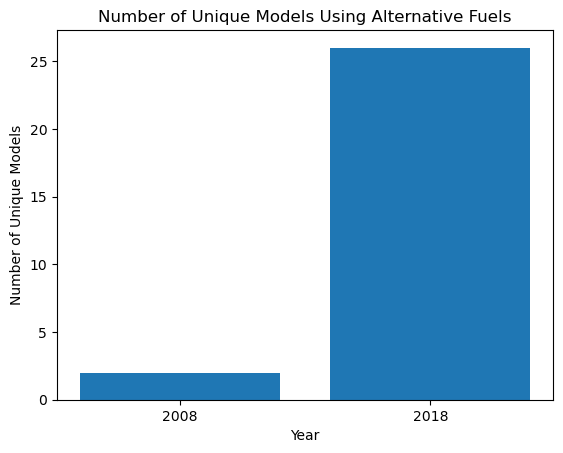

In [90]:
plt.bar(["2008", "2018"], [alt08, alt18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models");

Since 2008, the number of unique models using alternative sources of fuel increased by 24. We can also look at proportions.

In [91]:
# total unique models each year
total08 = df1.model.nunique()
total18 = df2.model.nunique()
total08, total18

(377, 357)

In [92]:
prop08 = alt08/total08
prop18 = alt18/total18
prop08, prop18

(0.005305039787798408, 0.07282913165266107)

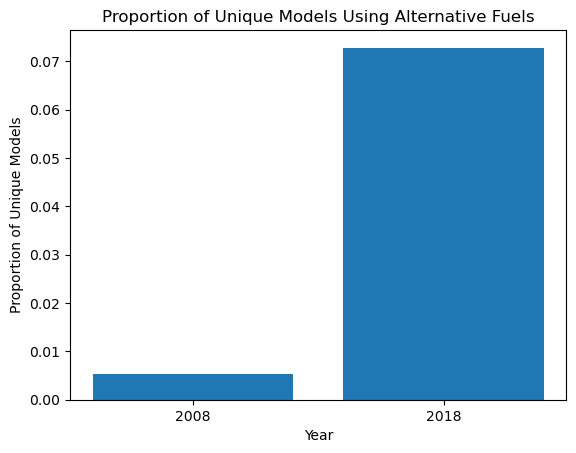

In [93]:
plt.bar(["2008", "2018"], [prop08, prop18])
plt.title("Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Proportion of Unique Models");

### Q2: How much have vehicle classes improved in fuel economy?  

Let's look at the average fuel economy for each vehicle class for both years.

In [94]:
df1.veh_class.value_counts(), df2.veh_class.value_counts()

(small car        333
 SUV              280
 midsize car      138
 pickup            83
 station wagon     60
 large car         55
 van               21
 minivan           17
 Name: veh_class, dtype: int64,
 small car          285
 midsize car        138
 small SUV          108
 large car           88
 standard SUV        86
 pickup              78
 station wagon       34
 special purpose     10
 minivan              5
 Name: veh_class, dtype: int64)

In [95]:
veh08 = df1.groupby('veh_class').cmb_mpg.mean()
veh08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [96]:
veh18 = df2.groupby('veh_class').cmb_mpg.mean()
veh18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [97]:
# Find the variance
variance = veh18 - veh08
variance

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

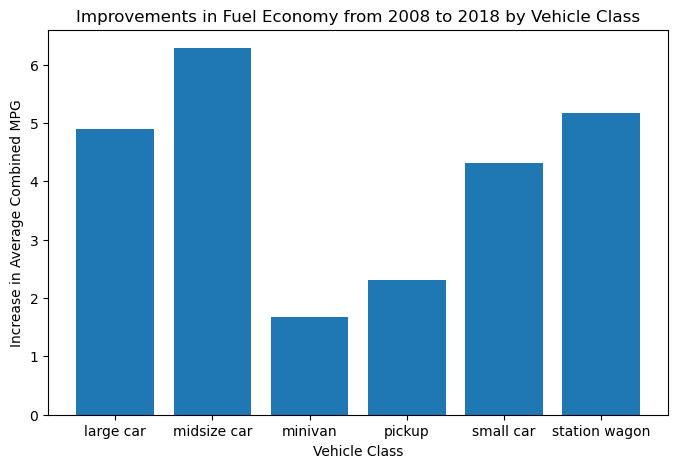

In [98]:
variance.dropna(inplace= True)
plt.subplots(figsize=[8,5])
plt.bar(variance.index, variance)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

### Answer

Midsize car, station wagon and large car have the highest improvements in fuel economy at 5.3%, 5.2% and 4.2% - followed by small car, pickup and mini van.

### Q3: What are the characteristics of SmartWay vehicles? Have they changed over time?

In [99]:
df1.smartway.unique()

array(['no', 'yes'], dtype=object)

In [100]:
smart08 = df1.query('smartway == "yes"')
smart08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes
5,ACURA TL,3.5,6,Man-6,2WD,Gasoline,midsize car,7.0,18.0,27.0,21.0,6,yes
7,ACURA TSX,2.4,4,Auto-S5,2WD,Gasoline,small car,6.0,20.0,28.0,23.0,7,yes
14,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,24.0,7,yes


In [101]:
smart08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [102]:
df2.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [103]:
smart18 = df2.query('smartway == ["Yes", "Elite"]')
smart18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
15,AUDI A4 Ultra,2.0,4,AMS-7,2WD,Gasoline,small car,3.0,27.0,37.0,31.0,7,Yes
120,BUICK Encore,1.4,4,SemiAuto-6,2WD,Gasoline,small SUV,3.0,27.0,33.0,30.0,7,Yes
168,CHEVROLET Cruze,1.4,4,Man-6,2WD,Gasoline,small car,6.0,27.0,40.0,32.0,7,Yes
169,CHEVROLET Cruze,1.4,4,SemiAuto-6,2WD,Gasoline,small car,6.0,29.0,40.0,33.0,8,Yes
170,CHEVROLET Cruze,1.6,4,Auto-9,2WD,Diesel,small car,3.0,31.0,47.0,37.0,7,Yes


In [104]:
smart18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


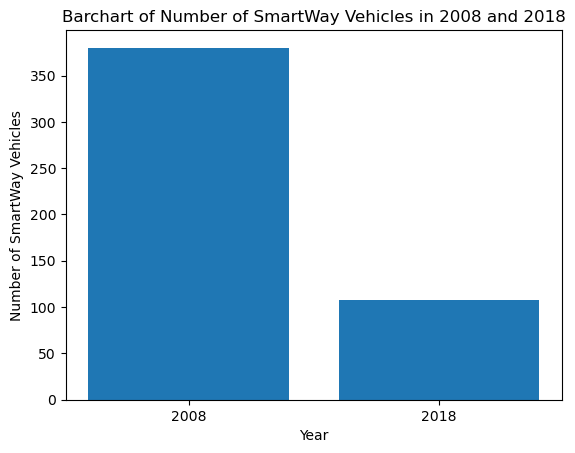

In [105]:
smart08count = 380
smart18count = 108
plt.bar(["2008", "2018"], [smart08count, smart18count])
plt.title("Barchart of Number of SmartWay Vehicles in 2008 and 2018")
plt.xlabel("Year")
plt.ylabel("Number of SmartWay Vehicles");

There are 380 SmartWay vehicles in 2008 (38% of sampled 987 cars) and only 108 SmartWay vehicles in 2018 (13% of sampled 832 cars) - that's at least a 65% reduction in vehicles passing the SmartWay test! Or, is it that the minimum passing threshold has increased in 2018?


now, we analyse the average greenhouse gas and air pollution scores for both years.

In [106]:
smartmean08 = smart08[["greenhouse_gas_score", "air_pollution_score"]].mean()
smartmean08

greenhouse_gas_score    6.868421
air_pollution_score     7.365789
dtype: float64

In [107]:
smartmean18 = smart18[["greenhouse_gas_score", "air_pollution_score"]].mean()
smartmean18

greenhouse_gas_score    7.925926
air_pollution_score     5.212963
dtype: float64

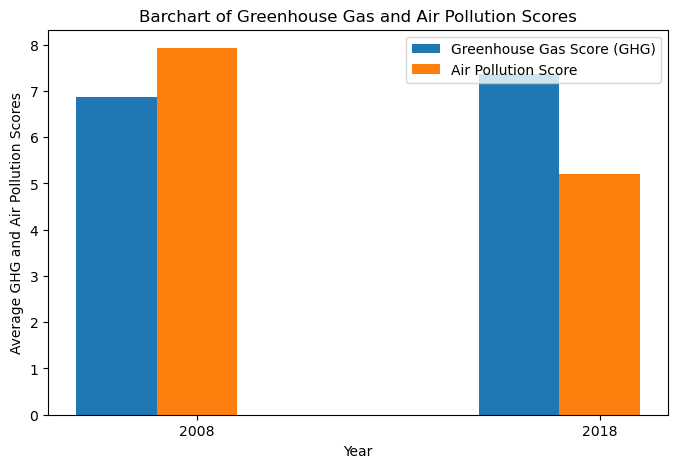

In [108]:
# Plotting barchart
x = np.arange(2)
width = 0.2

plt.subplots(figsize=[8,5])
plt.bar(x-0.2, smartmean08, width)
plt.bar(x, smartmean18, width)
plt.title("Barchart of Greenhouse Gas and Air Pollution Scores")
plt.xticks(x, ["2008", "2018"])
plt.xlabel("Year")
plt.ylabel("Average GHG and Air Pollution Scores")
plt.legend(["Greenhouse Gas Score (GHG)", "Air Pollution Score"]);

The average greenhouse gas score has increased from 6.8 to 7.9, but air pollution average score has dropped from 7.4 to 5.2. This seems strange 



### Q4: What features are associated with better fuel economy?

The features associated with better fuel economy are city fuel economy `city_mpg` and highway fuel economy `hwy_mpg` or, we can instead take a look at the combined city/ highway fuel economy `cmb_mpg` feature.


In [109]:
cmb_mean08 = df1.query('cmb_mpg > cmb_mpg.mean()')
cmb_mean08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes
5,ACURA TL,3.5,6,Man-6,2WD,Gasoline,midsize car,7.0,18.0,27.0,21.0,6,yes
6,ACURA TSX,2.4,4,Man-6,2WD,Gasoline,small car,6.0,19.0,28.0,22.0,6,no
7,ACURA TSX,2.4,4,Auto-S5,2WD,Gasoline,small car,6.0,20.0,28.0,23.0,7,yes


In [110]:
cmb_mean08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


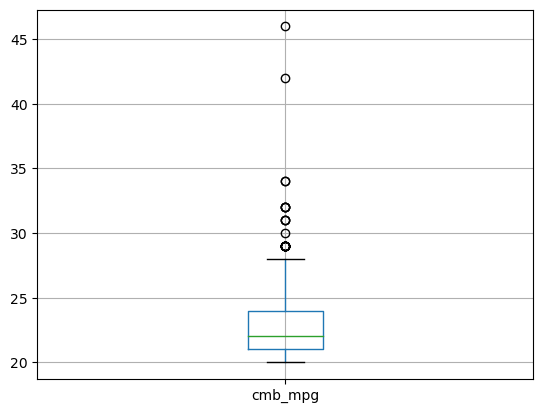

In [111]:
cmb_mean08.boxplot(column='cmb_mpg');

In [112]:
cmb_mean18 = df2.query('cmb_mpg> cmb_mpg.mean()')
cmb_mean18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
7,ALFA ROMEO 4C,1.8,4,AutoMan-6,2WD,Gasoline,small car,1.0,24.0,34.0,28.0,6,No
9,AUDI A3,2.0,4,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
10,AUDI A3,2.0,4,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
11,AUDI A3 Cabriolet,2.0,4,AMS-6,4WD,Gasoline,small car,7.0,22.0,30.0,25.0,5,No


In [113]:
cmb_mean18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


<Axes: >

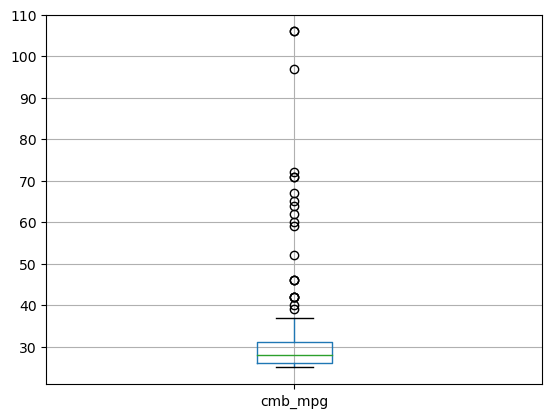

In [114]:
cmb_mean18.boxplot(column='cmb_mpg')

Q5: For all of the models that were produced in 2008 that are still being produced in 2018, how much has the mpg improved and which vehicle improved the most?


## Merging Datasets

**1. Rename 2008 columns to distinguish from 2018 columns after the merge**

To do this, use pandas' [`rename()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html) with a lambda function. In the lambda function, take the first 10 characters of the column label and and concatenate it with _2008. (Only take the first 10 characters to prevent really long column names.)

The lambda function should look something like this: `lambda x: x[:10] + "_2008"`

In your rename, don't forget to specify the parameter `columns=` when you add the lambda function!

**2. Perform inner merge**

To answer the last question, we are only interested in how the same model of car has been updated and how the new model's mpg compares to the old model's mpg.

Perform an inner [merge](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) with the left on `model_2008` and the right on model. 

In [115]:
# rename 2008 columns
df1 = df1.rename(columns = (lambda x: x[:10] + '_2008'))
df1.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [116]:
# rename 2018 columns
# df2 = df2.rename(columns= (lambda x: x[:10] + '_2018'))
df2.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No


In [117]:
dfconcat = pd.concat((df1, df2), axis=1, join='inner')

In [118]:
dfconcat.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,...,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,...,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,...,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No


As we only interestd in how the same model of car has been updated we 'll compare mpg models

In [119]:
# To do this, group by `model` and find the mean `cmb_mpg_2008` and mean `cmb_mpg` for each.
cmb_mpg_model = dfconcat.groupby('model')[["cmb_mpg_2008", "cmb_mpg"]].mean()

In [120]:
cmb_mpg_model.head()

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,18.0,22.5
ACURA TLX,20.0,25.0
ACURA TLX AWD A-SPEC,21.0,23.0
ACURA TLX FWD A-SPEC,22.0,23.0
ALFA ROMEO 4C,23.0,28.0


In [121]:
cmb_mpg_model.shape

(357, 2)

#### 2. Create a new column, `mpg_change`, with the change in mpg
Subtract the mean mpg in 2008 from that in 2018 to get the change in mpg

In [122]:
cmb_mpg_model['mpg_change'] = cmb_mpg_model['cmb_mpg'] - cmb_mpg_model['cmb_mpg_2008']

In [123]:
cmb_mpg_model.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,18.0,22.5,4.5
ACURA TLX,20.0,25.0,5.0
ACURA TLX AWD A-SPEC,21.0,23.0,2.0
ACURA TLX FWD A-SPEC,22.0,23.0,1.0
ALFA ROMEO 4C,23.0,28.0,5.0


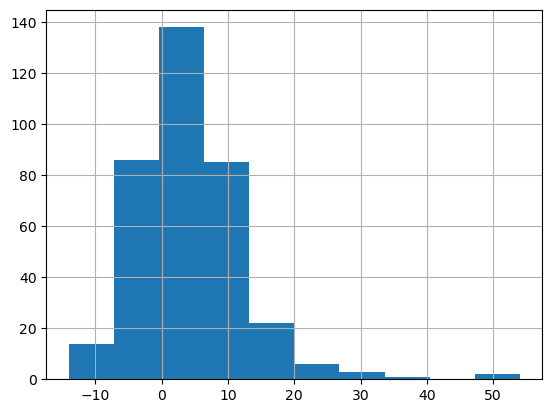

In [124]:
cmb_mpg_model['mpg_change'].hist();

 the vehicle that improved the most  
Find the max mpg change, and then use query or indexing to see what model it is!

In [125]:
max_mpg_change = cmb_mpg_model['mpg_change'].max()
max_mpg_change

54.0

In [126]:
cmb_mpg_model[cmb_mpg_model['mpg_change'] == max_mpg_change]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
CHEVROLET Volt,20.0,74.0,54.0
